In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# 1. Cargar el dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Conjuntos de datos de entrenamiento y prueba
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [3]:
# 2. Visualizar ejemplos de imágenes y sus etiquetas
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
# Obtener un lote de imágenes
dataiter = iter(trainloader)
images, labels = next(dataiter) 

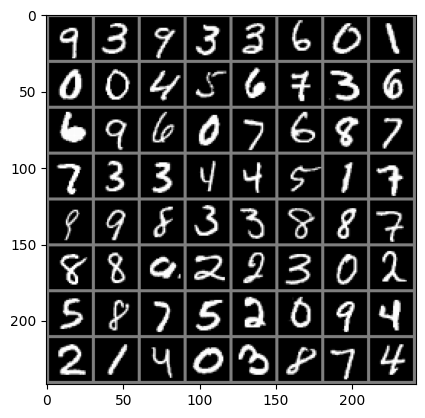

    9     3     9     3     3     6     0     1


In [5]:
# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % labels[j].item() for j in range(8)))

In [6]:
# Clase del modelo de red neuronal
class NeuralNet(nn.Module):
    def __init__(self, activation_func):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Capa oculta 1
        self.fc2 = nn.Linear(128, 64)   # Capa oculta 2
        self.fc3 = nn.Linear(64, 10)    # Capa de salida
        self.dropout = nn.Dropout(0.5)  # Dropout con una tasa de 50%
        self.activation_func = activation_func

    def forward(self, x):
        x = x.view(-1, 28*28)  # Despliega la imagen 28x28 en un vector de 784
        x = self.activation_func(self.fc1(x))
        x = self.activation_func(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)  # Función de activación Softmax en la salida
        return x

In [7]:
# Función para entrenar el modelo
def train_model(model, optimizer, criterion, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}')


In [8]:
# Función para evaluar el modelo
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

In [9]:
# Parámetros de entrenamiento
num_epochs = 20
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()

In [10]:
# 1. Entrenamiento con ReLU
print("Entrenando con ReLU")
model_relu = NeuralNet(activation_func=F.relu)
optimizer_relu = optim.Adam(model_relu.parameters(), lr=learning_rate)
train_model(model_relu, optimizer_relu, criterion, num_epochs)
evaluate_model(model_relu)

# 2. Entrenamiento con Sigmoid
print("\nEntrenando con Sigmoid")
model_sigmoid = NeuralNet(activation_func=torch.sigmoid)
optimizer_sigmoid = optim.Adam(model_sigmoid.parameters(), lr=learning_rate)
train_model(model_sigmoid, optimizer_sigmoid, criterion, num_epochs)
evaluate_model(model_sigmoid)

# 3. Entrenamiento con Tanh
print("\nEntrenando con Tanh")
model_tanh = NeuralNet(activation_func=torch.tanh)
optimizer_tanh = optim.Adam(model_tanh.parameters(), lr=learning_rate)
train_model(model_tanh, optimizer_tanh, criterion, num_epochs)
evaluate_model(model_tanh)

# 4. Entrenamiento con Tanh (con Dropout añadido)
print("\nEntrenando con Tanh y Dropout")
model_tanh_dropout = NeuralNet(activation_func=torch.tanh)
optimizer_tanh_dropout = optim.Adam(model_tanh_dropout.parameters(), lr=learning_rate)
train_model(model_tanh_dropout, optimizer_tanh_dropout, criterion, num_epochs)
evaluate_model(model_tanh_dropout)

Entrenando con ReLU
Epoch [1/20], Loss: 1.6909
Epoch [2/20], Loss: 1.5471
Epoch [3/20], Loss: 1.5262
Epoch [4/20], Loss: 1.5163
Epoch [5/20], Loss: 1.5090
Epoch [6/20], Loss: 1.5052
Epoch [7/20], Loss: 1.5008
Epoch [8/20], Loss: 1.4964
Epoch [9/20], Loss: 1.4966
Epoch [10/20], Loss: 1.4951
Epoch [11/20], Loss: 1.4928
Epoch [12/20], Loss: 1.4922
Epoch [13/20], Loss: 1.4908
Epoch [14/20], Loss: 1.4891
Epoch [15/20], Loss: 1.4897
Epoch [16/20], Loss: 1.4891
Epoch [17/20], Loss: 1.4876
Epoch [18/20], Loss: 1.4864
Epoch [19/20], Loss: 1.4864
Epoch [20/20], Loss: 1.4863
Accuracy: 97.22%

Entrenando con Sigmoid
Epoch [1/20], Loss: 1.8281
Epoch [2/20], Loss: 1.5545
Epoch [3/20], Loss: 1.5275
Epoch [4/20], Loss: 1.5150
Epoch [5/20], Loss: 1.5075
Epoch [6/20], Loss: 1.5019
Epoch [7/20], Loss: 1.4976
Epoch [8/20], Loss: 1.4946
Epoch [9/20], Loss: 1.4928
Epoch [10/20], Loss: 1.4904
Epoch [11/20], Loss: 1.4882
Epoch [12/20], Loss: 1.4864
Epoch [13/20], Loss: 1.4853
Epoch [14/20], Loss: 1.4848
Epoch